# Logistic Regression, SVMs, and Gradient Optimization

In [12]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv("/Users/robertrivens/bank.csv",low_memory=False,parse_dates=True)  #read in the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [13]:
#Remove attributes that arent useful

del df['month']
del df['day_of_week']
del df['contact']
del df['duration']

# creates a new variable for age ranges
df['age'] = pd.cut(df.age,[0,16,24,65,1e6],4,labels=[0,1,2,3]) 

#Convert objects to Integers
df.job.replace(('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'), (0,1,2,3,4,5,6,7,8,9,10,11), inplace=True)
df.marital.replace(('divorced','married','single','unknown'), (0,1,2,3), inplace=True)
df.education.replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'), (0,1,2,3,4,5,6,7), inplace=True)
df.default.replace(('yes', 'no', 'unknown'), (2, 1, 0), inplace=True)
df.housing.replace(('yes', 'no', 'unknown'), (2, 1, 0), inplace=True)
df.loan.replace(('yes', 'no', 'unknown'), (2, 1, 0), inplace=True)
df.poutcome.replace(('failure','nonexistent','success'), (0,1,2), inplace=True)
df.y.replace(('yes', 'no', 'unknown'), (2, 1, 0), inplace=True)


___
# Training and Testing Split
For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. We will use the hold out cross validation method built into `scikit-learn`.

In [14]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in df:
    y = df['y'].values # get the labels we want
    del df['y'] # get rid of the class label
    X = df.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


___
# Logistic Regression

In [15]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.902767662054
confusion matrix
 [[7265   72]
 [ 729  172]]
====Iteration 1  ====
accuracy 0.896576839039
confusion matrix
 [[7215   78]
 [ 774  171]]
====Iteration 2  ====
accuracy 0.899126001457
confusion matrix
 [[7237   79]
 [ 752  170]]


In [16]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.901310997815
confusion matrix
 [[7261   77]
 [ 736  164]]
====Iteration 1  ====
accuracy 0.891964068949
confusion matrix
 [[7188   83]
 [ 807  160]]
====Iteration 2  ====
accuracy 0.899611556203
confusion matrix
 [[7236   74]
 [ 753  175]]


In [17]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.89997572  0.89754795  0.90033989]


In [18]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

A Jupyter Widget

<function __main__.lr_explor>

## Interpretting weights
Okay, so now lets take the last trained model for logistic regression and try to interpret the weights for the model. Is there something about the weights that makes this model more interpretable?

In [20]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

age has weight of 0.0214144248892
job has weight of 0.00720268939821
marital has weight of 0.0521642461534
education has weight of 0.041777368972
default has weight of 0.0630545069815
housing has weight of 0.00300653280151
loan has weight of 0.00605862820559
campaign has weight of -0.0132686957713
pdays has weight of -0.00146186280996
previous has weight of -0.066909906875
poutcome has weight of 0.090091175225
emp.var.rate has weight of -0.154900677203
cons.price.idx has weight of 0.331902120536
cons.conf.idx has weight of 0.0346407429572
euribor3m has weight of -0.183147428128
nr.employed has weight of -0.00588490517797


These weight interpretations **are not neccessarily interpretable** because of the values we had. Very large attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their poredictive power in the logistic regression model.
___

In [22]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.89936877883
[[7238   78]
 [ 751  171]]
emp.var.rate has weight of -0.587645785043
nr.employed has weight of -0.401520065237
pdays has weight of -0.212833432151
campaign has weight of -0.119595000194
euribor3m has weight of -0.039638223033
previous has weight of -0.0265413961677
loan has weight of -0.0161674721485
housing has weight of 0.00373514251113
job has weight of 0.0163405512144
age has weight of 0.0372928082593
marital has weight of 0.0409822316418
education has weight of 0.0885254509712
cons.conf.idx has weight of 0.117571230822
default has weight of 0.139944704254
poutcome has weight of 0.140704737511
cons.price.idx has weight of 0.271098608991


/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


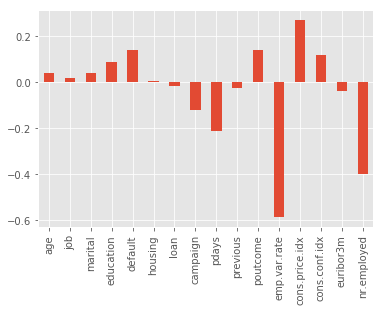

In [24]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

**For more improvement and guarding against overfitting:** At this point it would make sense to remove variables that are highly related to one another or ones that are irrelevant and keep going with the weights analysis. What variables would you remove?
___

In [25]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:


import plotly as plotly

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

**For more improvement and guarding against overfitting:** At this point it would make sense to remove variables that are highly related to one another or ones that are irrelevant and keep going with the weights analysis. What variables would you remove?

In [30]:
Xnew = df[['education','default','campaign']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['education','default','campaign'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/robertrivens/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


NameError: name 'plotly' is not defined

# Support Vector Machines
We can use the previous training and testing attributes (scaled) to investigate the weights and support vectors in the attributes. SVMs were first hypothesized by Vladmir Vapnik ~50 years ago, but did not gain popularity until the turn of the millenium. 

In [17]:
from IPython.display import Image
# Here he is, in all his glory:
Image(url='http://engineering.columbia.edu/files/engineering/vapnik.jpg')
# Image(url='http://yann.lecun.com/ex/images/allyourbayes.jpg')

In [18]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [19]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.847457627119
[[99  9]
 [18 51]]


In [20]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(369, 11)
(369,)
[189 180]


In [21]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')

AttributeError: coef_ is only available when using a linear kernel

In [22]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['Survived'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df_imputed['Survived'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 475 to 604
Data columns (total 12 columns):
Age           369 non-null float64
age_range     369 non-null int64
Parch         369 non-null int64
SibSp         369 non-null int64
Pclass        369 non-null int64
Fare          369 non-null float64
Embarked_C    369 non-null uint8
Embarked_Q    369 non-null uint8
Embarked_S    369 non-null uint8
IsMale        369 non-null int64
FamilySize    369 non-null int64
Survived      369 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 29.9 KB


/Users/robertrivens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


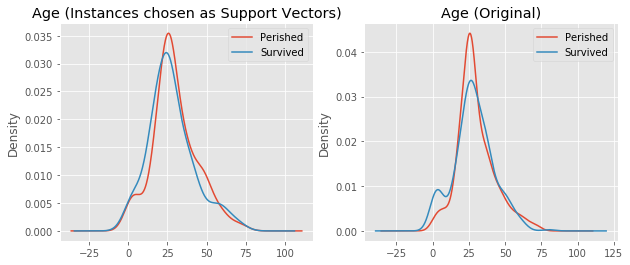

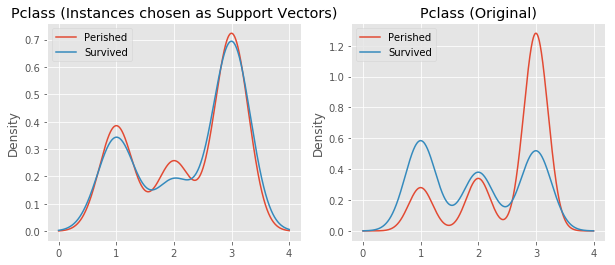

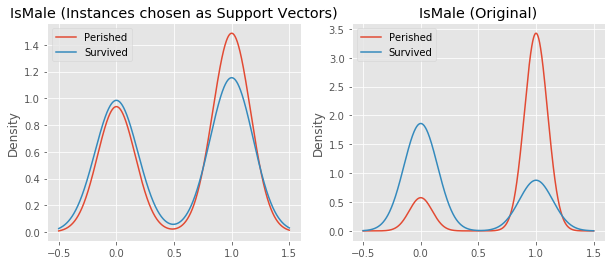

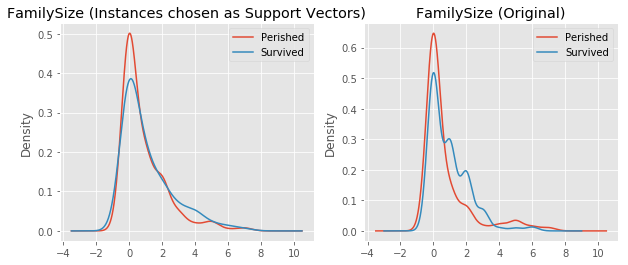

In [23]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Survived'])
df_grouped = df_imputed.groupby(['Survived'])

# plot KDE of Different variables
vars_to_plot = ['Age','Pclass','IsMale','FamilySize']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Original)')



So the analysis here is basically telling us what the original statistics of the data looked like, and also what the statistics of the support vectors looked like. We can see that the separation in distributions is not as great as the separation for the original data. This is because the support vectors tend to be instances on the edge of the class boundaries and also instances that are classified incorrectly in the training data. 

You can also look at joint plots of the data and see how relationships have changed. (**Hint hint for the min-lab assignment**--this would be a nice analysis of the support vectors.)

That's mostly it for using these things! They are really nice analysis tools and provide human interpretable summaries of the data. 
___

# Gradient Based Alternatives
So now let's go and find out how we can use these when our data size gets bigger. Like a lot bigger. We will use a kaggle dataset that attempts to classify plankton. We will use some example code to get us started from the tutorial here:
http://www.kaggle.com/c/datasciencebowl/details/tutorial 

You can download from Kaggle (login required): https://www.kaggle.com/c/datasciencebowl/data

UPDATE: This problem was also solved using deep learning! Check out the blog here:
http://benanne.github.io/2015/03/17/plankton.html 

In [24]:
Image(url='https://kaggle2.blob.core.windows.net/competitions/kaggle/3978/media/plankton%20schmorgasborg.jpg')

In [25]:
# load another dataset (large) and train using various methods of gradient (and mini-batch)
import glob
import os
from __future__ import print_function

# change this to point to the dataset on your machine/cluster!!
# For my students: please email me for a link to the data if you cannot get it from Kaggle
directory_of_dataset = "/Users/eclarson/Desktop/"

# get the classnames from the directory structure
directory_names = list(set(glob.glob(os.path.join(directory_of_dataset,"kaggle_plank", "*"))
 ).difference(set(glob.glob(os.path.join(directory_of_dataset,"kaggle_plank","*.*")))))

print('number of classes:', len(directory_names))

number of classes: 0


In [26]:
# using this code requires the use of skimage to process the images (you will need to install via pip)
import pandas as pd
import numpy as np

# Rescale the images and create the combined metrics and training labels
from skimage.transform import resize
from skimage.io import imread

#get the total training images
numberofImages = 0
for folder in directory_names:
    for fileNameDir in os.walk(folder):   
        for fileName in fileNameDir[2]:
             # Only read in the images
            if fileName[-4:] != ".jpg":
              continue
            numberofImages += 1

# We'll rescale the images to be 40x40
maxPixel = 25
imageSize = maxPixel * maxPixel
num_rows = numberofImages # one row for each image in the training dataset
num_features = imageSize # for our ratio

# X is the feature vector with one row of features per image
# consisting of the pixel values and our metric
X = np.zeros((num_rows, num_features), dtype=float)
# y is the numeric class label 
y = np.zeros((num_rows))

files = []
# Generate training data
i = 0    
label = 0
# List of string of class names
namesClasses = list()

print("Reading images")
# Navigate through the list of directories
for folder in directory_names:
    # Append the string class name for each class
    currentClass = folder.split(os.pathsep)[-1]
    namesClasses.append(currentClass)
    for fileNameDir in os.walk(folder):   
        for fileName in fileNameDir[2]:
            # Only read in the images
            if fileName[-4:] != ".jpg":
              continue
            
            # Read in the images and create the features
            nameFileImage = "{0}{1}{2}".format(fileNameDir[0], os.sep, fileName)            
            image = imread(nameFileImage, as_grey=True)
            files.append(nameFileImage)
            #axisratio = getMinorMajorRatio(image)
            image = resize(image, (maxPixel, maxPixel))
            
            # Store the rescaled image pixels and the axis ratio
            X[i, 0:imageSize] = np.reshape(image, (1, imageSize))
            #X[i, imageSize] = axisratio
            
            # Store the classlabel
            y[i] = label
            i += 1
            # report progress for each 5% done  
            report = [int((j+1)*num_rows/20.) for j in range(20)]
            if i in report: print(np.ceil(i *100.0 / num_rows), "% done")
    label += 1

Reading images


In [27]:
# here is where the online tutorial code stops and my code starts
print(X.shape)
print(y.shape)

(0, 625)
(0,)


In [28]:
# now divide the data into test and train using scikit learn built-ins
from sklearn.model_selection import StratifiedShuffleSplit 

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.5)

In [29]:
%%time
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [30]:
%%time
# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [31]:
%%time
# now lets use some of what we know from this class to reduce the dimensionality of the set
from sklearn.decomposition import PCA
n_components = 50

pca = PCA(n_components=n_components, svd_solver='randomized')

iterations = 150
log_sgd = SGDClassifier(
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter=iterations, n_jobs=-1, penalty='l2')

# you could also set this up in a pipeline
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(pca.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(pca.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

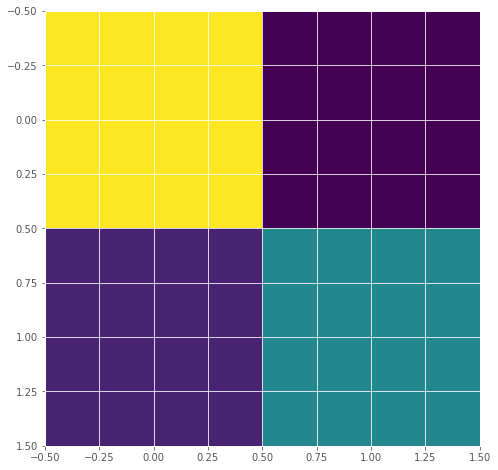

In [32]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

The competition does not use "accuracy" as the evaluation of the best model; they use the log loss:
$$logloss=-\frac{1}{N}\sum_{i=1}^m\sum_{j=1}^C {\bf 1}_{ij}\ln(p_{ij})$$

Where there are $m$ instances (images) in the dataset, and $C$ is the number of classes. The equation ${\bf 1}_{ij}$ is an indicator function that ensures we only add log probabilities when the class is correct. That is, it is zero if the predicted class for the $i^{th}$ instance is not equal to $j$ and it is one when the class of the $i^{th}$ instance == $j$. To prevent extremities in the log function they also replace probabilities, $p$, with $p=\max(\min(p,1-10^{-15}),10^{-15})$

Would this be easy to code in python? `scikit-learn` has an implementation for log loss, but it is not exactly what the competition uses and is only defined for binary classes.

In [33]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss

___
## How do you think you might increase the accuracy of the classifier(s)?
- Search through parameters for models?
- Try different classifiers?
- Add more features (through better image processing)?

___
## How do you think we can make the algorithms more efficient for training/testing?
- What about mini-batch training? 
- Sampling?
- Map/Reduce (what are advantages/disadvantages)?
- Buy a ton of memory on AWS virtual machines?

**Note:** For mini-batch calculations (they are not really needed here because the dataset fits in memory) they can be accessed for a number of different classifiers (including SGDClassifier) by managing the sub-samples we send it, $X_{sub}$, and calling the function `partial_fit`.